# The Packages

In [1]:
import numpy as np
import pandas as pd
import os
import gc
import warnings

In [2]:
# PACF - ACF
# ------------------------------------------------------
import statsmodels.api as sm


In [3]:
# DATA VISUALIZATION
# ------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:
# CONFIGURATIONS
# ------------------------------------------------------
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

# The Data

In [5]:
wfc = pd.read_csv('Dataset/WFC Daily.csv')

In [6]:
wfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,27.02,27.48,26.82,27.32,19.50,39335700
1,2010-01-05,27.27,28.24,27.24,28.07,20.03,55416000
2,2010-01-06,28.03,28.33,27.79,28.11,20.06,33237000
3,2010-01-07,28.12,29.43,27.92,29.13,20.79,61649000
4,2010-01-08,28.90,29.35,28.60,28.86,20.60,35508700


In [7]:
wfc.Date.dtype

dtype('O')

In [8]:
wfc['Date'] = pd.to_datetime(wfc['Date'])
wfc.set_index(['Date'],inplace=True)

In [9]:
wfc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,27.02,27.48,26.82,27.32,19.50,39335700
2010-01-05,27.27,28.24,27.24,28.07,20.03,55416000
2010-01-06,28.03,28.33,27.79,28.11,20.06,33237000
2010-01-07,28.12,29.43,27.92,29.13,20.79,61649000
2010-01-08,28.90,29.35,28.60,28.86,20.60,35508700


In [10]:
wfc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2010-01-04 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2768 non-null   float64
 1   High       2768 non-null   float64
 2   Low        2768 non-null   float64
 3   Close      2768 non-null   float64
 4   Adj Close  2768 non-null   float64
 5   Volume     2768 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 151.4 KB


In [11]:
def splitDataset(dataset):

    size = dataset.shape[0]
    
    train_size = size * 70 // 100
    test_size = size * 15 // 100
    
    return dataset[0:train_size, :], dataset[train_size:(train_size + test_size), :], dataset[(train_size + test_size):size, :]

In [12]:
train_dataset, cross_validation_dataset, dev_dataset = splitDataset(wfc.values)

print("Dataset shape: {:s}".format(str(wfc.values.shape)))
print("Train dataset shape: {:s}".format(str(train_dataset.shape)))
print("Cross validation dataset shape: {:s}".format(str(cross_validation_dataset.shape)))
print("Dev dataset shape: {:s}".format(str(dev_dataset.shape)))

Dataset shape: (2768, 6)
Train dataset shape: (1937, 6)
Cross validation dataset shape: (415, 6)
Dev dataset shape: (416, 6)


In [16]:
train_dataset

array([[2.7020000e+01, 2.7480000e+01, 2.6820000e+01, 2.7320000e+01,
        1.9496157e+01, 3.9335700e+07],
       [2.7270000e+01, 2.8240000e+01, 2.7240000e+01, 2.8070000e+01,
        2.0031376e+01, 5.5416000e+07],
       [2.8030001e+01, 2.8330000e+01, 2.7790001e+01, 2.8110001e+01,
        2.0059919e+01, 3.3237000e+07],
       ...,
       [4.9610001e+01, 4.9980000e+01, 4.9430000e+01, 4.9580002e+01,
        4.2619076e+01, 1.8975700e+07],
       [5.0000000e+01, 5.0799999e+01, 4.9939999e+01, 5.0660000e+01,
        4.3547440e+01, 1.7987100e+07],
       [5.0849998e+01, 5.1730000e+01, 5.0840000e+01, 5.1570000e+01,
        4.4329689e+01, 1.7129500e+07]])

In [13]:
def plotSeries(time, series, lab, form='-', start=0, end=None):
    plt.plot(time[start:end], series[start:end], form, label=lab)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)

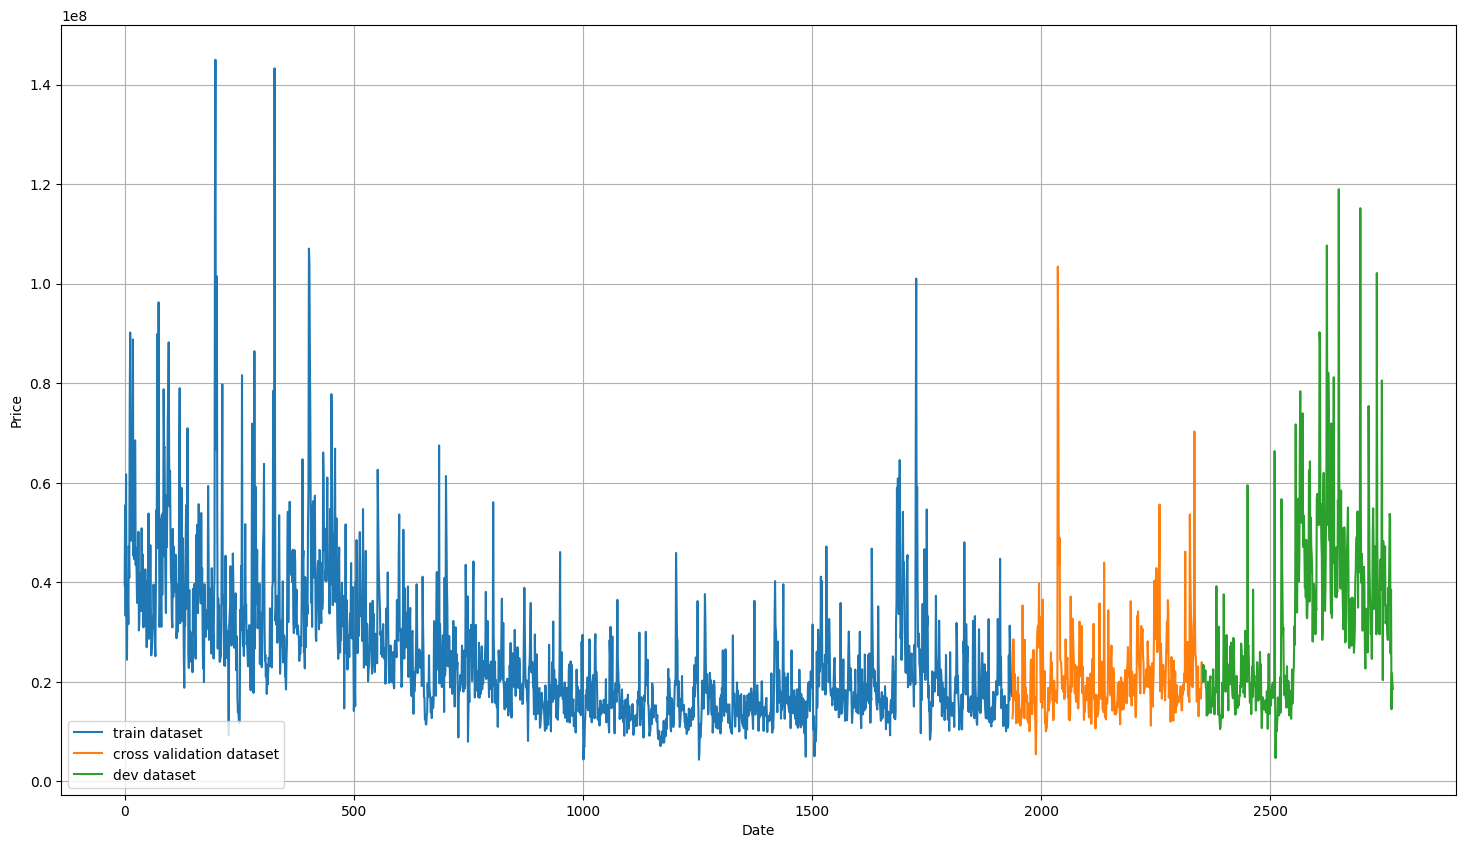

In [14]:
plt.figure(figsize=(18, 10))
plotSeries(np.arange(train_dataset.shape[0]), train_dataset[:, -1], "train dataset")
plotSeries(np.arange(train_dataset.shape[0], (cross_validation_dataset.shape[0] + train_dataset.shape[0])), cross_validation_dataset[:, -1], "cross validation dataset")
plotSeries(np.arange((cross_validation_dataset.shape[0] + train_dataset.shape[0]), (cross_validation_dataset.shape[0]+ train_dataset.shape[0] + dev_dataset.shape[0])), dev_dataset[:, -1], "dev dataset")
plt.legend(loc='lower left')